Epoch 0, Loss: 0.4279, Training Accuracy: 0.8049, Testing Accuracy: 0.8027
Epoch 1, Loss: 0.6458, Training Accuracy: 0.8323, Testing Accuracy: 0.8344
Epoch 2, Loss: 0.4319, Training Accuracy: 0.8374, Testing Accuracy: 0.8392
Epoch 3, Loss: 0.4122, Training Accuracy: 0.8491, Testing Accuracy: 0.8508
Epoch 4, Loss: 0.5073, Training Accuracy: 0.8551, Testing Accuracy: 0.8568
Epoch 5, Loss: 0.5353, Training Accuracy: 0.8515, Testing Accuracy: 0.8496
Epoch 6, Loss: 0.4624, Training Accuracy: 0.8582, Testing Accuracy: 0.8557
Epoch 7, Loss: 0.4614, Training Accuracy: 0.8588, Testing Accuracy: 0.8590
Epoch 8, Loss: 0.1869, Training Accuracy: 0.8656, Testing Accuracy: 0.8608
Epoch 9, Loss: 0.2493, Training Accuracy: 0.8713, Testing Accuracy: 0.8664
Epoch 10, Loss: 0.3180, Training Accuracy: 0.8721, Testing Accuracy: 0.8716
Epoch 11, Loss: 0.2491, Training Accuracy: 0.8749, Testing Accuracy: 0.8682
Epoch 12, Loss: 0.3552, Training Accuracy: 0.8709, Testing Accuracy: 0.8657
Epoch 13, Loss: 0.5428

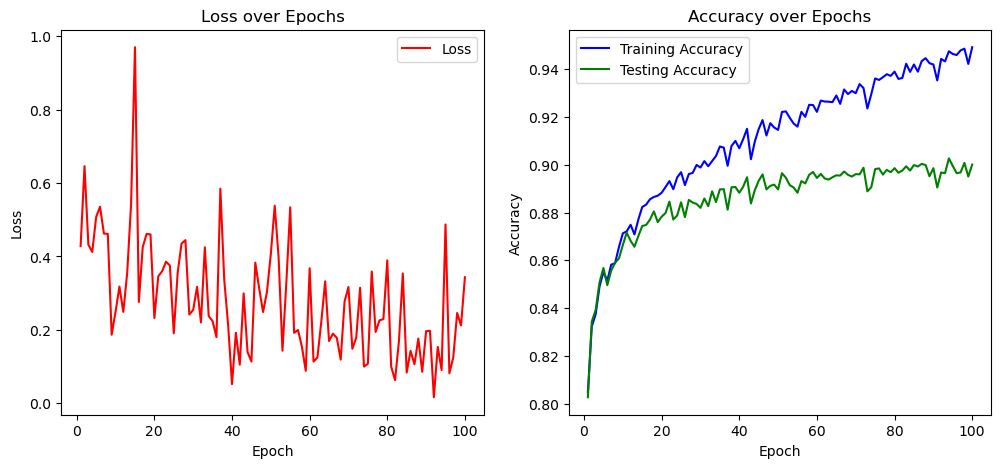

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    p = softmax(y_pred)
    log_likelihood = -np.log(p[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def delta_cross_entropy_softmax(y_pred, y_true):
    m = y_true.shape[0]
    grad = softmax(y_pred)
    grad[range(m), y_true] -= 1
    grad = grad / m
    return grad

class SimpleFullyConnectedNN:
    def __init__(self, input_size=784, hidden_size=256, output_size=10):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2
    
    def backward(self, X, y, y_pred, learning_rate):
        m = y.shape[0]
        dz2 = delta_cross_entropy_softmax(y_pred, y)
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        
        dz1 = np.dot(dz2, self.W2.T) * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0)
        
        # Update the weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X_train, y_train, num_epochs, learning_rate, batch_size=32):
        history = {'loss': [], 'train_acc': [], 'test_acc': []}
        for epoch in range(num_epochs):
            permutation = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train[permutation]
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]
                y_pred = self.forward(X_batch)
                loss = cross_entropy_loss(y_pred, y_batch)
                self.backward(X_batch, y_batch, y_pred, learning_rate)
            train_acc = self.accuracy(X_train, y_train)
            test_acc = self.accuracy(X_test, y_test)
            history['loss'].append(loss)
            history['train_acc'].append(train_acc)
            history['test_acc'].append(test_acc)
            print(f'Epoch {epoch}, Loss: {loss:.4f}, Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}')
        return history
    
    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return (y_pred == y).mean()

def plot_metrics(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'r-', label='Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history['test_acc'], 'g-', label='Testing Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Load the dataset
train_data = pd.read_csv("D:/下载的文件/archive/fashion-mnist_train.csv")
test_data = pd.read_csv("D:/下载的文件/archive/fashion-mnist_test.csv")

# Prepare the training data
X_train = train_data.iloc[:, 1:].values / 255.0  # Pixel values are normalized to [0, 1] range
y_train = train_data.iloc[:, 0].values           # First column is label

# Prepare the testing data
X_test = test_data.iloc[:, 1:].values / 255.0    # Pixel values are normalized to [0, 1] range
y_test = test_data.iloc[:, 0].values             # First column is label

# Initialize and train the model
model = SimpleFullyConnectedNN()
history = model.train(X_train, y_train, num_epochs=10, learning_rate=0.01)

# Evaluate the model
print('Training accuracy:', model.accuracy(X_train, y_train))
print('Testing accuracy:', model.accuracy(X_test, y_test))

# Plot the training and testing metrics
plot_metrics(history)


In [15]:
# Define the class names for the Fashion MNIST dataset
class_names = [
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# Function to calculate class-wise accuracy
def calculate_class_accuracy(y_pred, y_true, num_classes):
    class_correct = np.zeros(num_classes)
    class_total = np.zeros(num_classes)
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            class_correct[y_pred[i]] += 1
        class_total[y_true[i]] += 1
    return class_correct, class_total

# Evaluate the model and print accuracy per class
y_pred = model.predict(X_test)
class_correct, class_total = calculate_class_accuracy(y_pred, y_test, num_classes=len(class_names))
for i, class_name in enumerate(class_names):
    print(f'Accuracy of {class_name}: {class_correct[i] / class_total[i] * 100:.2f}%')

# Generate and print classification report with class names
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=2))



Accuracy of T-shirt: 81.20%
Accuracy of Trouser: 98.60%
Accuracy of Pullover: 80.80%
Accuracy of Dress: 92.30%
Accuracy of Coat: 88.40%
Accuracy of Sandal: 95.70%
Accuracy of Shirt: 76.90%
Accuracy of Sneaker: 91.90%
Accuracy of Bag: 97.20%
Accuracy of Ankle boot: 97.10%
Classification report:
              precision    recall  f1-score   support

     T-shirt       0.87      0.81      0.84      1000
     Trouser       0.98      0.99      0.99      1000
    Pullover       0.87      0.81      0.84      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.83      0.88      0.86      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.74      0.77      0.75      1000
     Sneaker       0.95      0.92      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
w

In [27]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Activation functions and derivatives
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

def softmax(x):
    e_x = torch.exp(x - torch.max(x, axis=1, keepdims=True))
    return e_x / torch.sum(e_x, axis=1, keepdims=True)

# Loss function
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    p = softmax(y_pred)
    log_likelihood = -torch.log(p[range(m), y_true])
    loss = torch.sum(log_likelihood) / m
    return loss

class SimpleFullyConnectedNN:
    def __init__(self, input_size=784, hidden_size=256, output_size=10):
        self.W1 = Variable(torch.randn(input_size, hidden_size).float() / np.sqrt(input_size), requires_grad=True)
        self.b1 = Variable(torch.zeros(hidden_size).float(), requires_grad=True)
        self.W2 = Variable(torch.randn(hidden_size, output_size).float() / np.sqrt(hidden_size), requires_grad=True)
        self.b2 = Variable(torch.zeros(output_size).float(), requires_grad=True)
        self.optimizer = torch.optim.SGD([self.W1, self.b1, self.W2, self.b2], lr=0.01)
    
    def forward(self, X):
        z1 = X @ self.W1 + self.b1
        a1 = relu(z1)
        z2 = a1 @ self.W2 + self.b2
        return z2
    
    def backward(self, X, y, y_pred):
        loss = cross_entropy_loss(y_pred, y)
        loss.backward()

    def train(self, X_train, y_train, X_test, y_test, num_epochs, batch_size=32):
        history = {'loss': [], 'train_acc': [], 'test_acc': []}
        X_train = torch.from_numpy(X_train).float()
        y_train = torch.from_numpy(y_train).long()
        X_test = torch.from_numpy(X_test).float()
        y_test = torch.from_numpy(y_test).long()
        for epoch in range(num_epochs):
            permutation = torch.randperm(X_train.size()[0])
            for i in range(0, X_train.size()[0], batch_size):
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = X_train[indices], y_train[indices]
                self.optimizer.zero_grad()
                y_pred = self.forward(batch_x)
                loss = cross_entropy_loss(y_pred, batch_y)
                loss.backward()
                self.optimizer.step()

        with torch.no_grad():
            train_loss = cross_entropy_loss(self.forward(X_train), y_train)
            train_acc = self.accuracy(X_train, y_train)
            test_acc = self.accuracy(X_test, y_test)
            history['loss'].append(train_loss.item())
            history['train_acc'].append(train_acc)
            history['test_acc'].append(test_acc)
            print(f'Epoch {epoch}, Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}')
        return history

    
    def predict(self, X):
        y_pred = self.forward(X)
        return torch.argmax(y_pred, axis=1).numpy()

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        y = torch.from_numpy(y).long()
        return (y_pred == y.numpy()).mean()

def plot_metrics(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'r-', label='Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history['test_acc'], 'g-', label='Testing Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Load and prepare the dataset
train_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_train.csv")
test_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_test.csv")
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# Convert test set to torch Variables for later accuracy calculation
X_test = Variable(torch.from_numpy(X_test).float())
y_test = Variable(torch.from_numpy(y_test).long())

# Initialize and train the model
model = SimpleFullyConnectedNN()
history = model.train(X_train, y_train, X_test, y_test, num_epochs=100, batch_size=16)


# Evaluate the model
train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

# Plot the training and testing metrics
plot_metrics(history)

# Class names for Fashion MNIST dataset
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Calculate and print accuracy for each class
y_pred_test = model.predict(X_test.numpy())
class_accuracies = accuracy_score(y_test.numpy(), y_pred_test, normalize=False)
for i, class_name in enumerate(class_names):
    print(f'Accuracy of {class_name}: {class_accuracies[i] / np.sum(y_test.numpy() == i) * 100:.2f}%')

# Generate and print classification report
print("Classification report:")
print(classification_report(y_test.numpy(), y_pred_test, target_names=class_names, digits=2))


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

Epoch [1/20], Loss: 0.5399, Train Accuracy: 0.8111, Test Accuracy: 0.8105
Epoch [2/20], Loss: 0.4540, Train Accuracy: 0.8424, Test Accuracy: 0.8391
Epoch [3/20], Loss: 0.4186, Train Accuracy: 0.8519, Test Accuracy: 0.8498
Epoch [4/20], Loss: 0.4186, Train Accuracy: 0.8551, Test Accuracy: 0.8551
Epoch [5/20], Loss: 0.3711, Train Accuracy: 0.8688, Test Accuracy: 0.8608
Epoch [6/20], Loss: 0.3701, Train Accuracy: 0.8683, Test Accuracy: 0.8665
Epoch [7/20], Loss: 0.3426, Train Accuracy: 0.8770, Test Accuracy: 0.8698
Epoch [8/20], Loss: 0.3256, Train Accuracy: 0.8831, Test Accuracy: 0.8743
Epoch [9/20], Loss: 0.3139, Train Accuracy: 0.8873, Test Accuracy: 0.8774
Epoch [10/20], Loss: 0.3529, Train Accuracy: 0.8712, Test Accuracy: 0.8599
Epoch [11/20], Loss: 0.3342, Train Accuracy: 0.8770, Test Accuracy: 0.8632
Epoch [12/20], Loss: 0.2918, Train Accuracy: 0.8942, Test Accuracy: 0.8817
Epoch [13/20], Loss: 0.2858, Train Accuracy: 0.8968, Test Accuracy: 0.8814
Epoch [14/20], Loss: 0.2816, Train

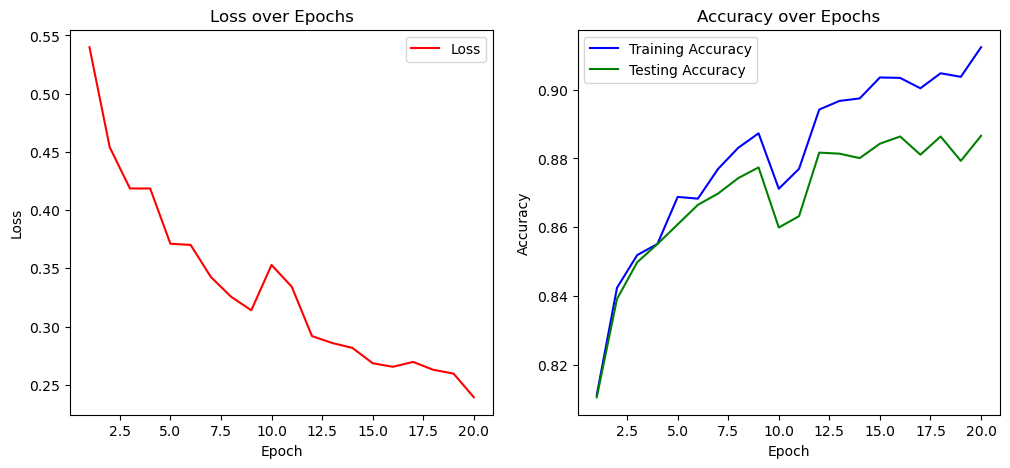

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Neural network with two hidden layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        out = self.output_layer(out)
        return out

# Load and prepare the dataset
train_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_train.csv")
test_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_test.csv")
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Hyperparameters
input_size = 784
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10
num_epochs = 20
batch_size = 16
learning_rate = 0.01

# Initialize the model
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
history = {'loss': [], 'train_acc': [], 'test_acc': []}
for epoch in range(num_epochs):
    permutation = torch.randperm(X_train.size()[0])
    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Calculate accuracy and loss for this epoch on training and test sets
    with torch.no_grad():
        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_acc = (train_predicted == y_train).sum().item() / y_train.size(0)

        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_acc = (test_predicted == y_test).sum().item() / y_test.size(0)
        
        history['loss'].append(train_loss.item())
        history['train_acc'].append(train_acc)
        history['test_acc'].append(test_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluation after training
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred = test_predicted.cpu().numpy()
y_true = y_test.cpu().numpy()
print("Classification report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=2))

# Plot training history
plot_metrics(history)


Epoch [1/20], Loss: 0.4922, Train Accuracy: 0.8260, Test Accuracy: 0.8239
Epoch [2/20], Loss: 0.4343, Train Accuracy: 0.8389, Test Accuracy: 0.8376
Epoch [3/20], Loss: 0.4436, Train Accuracy: 0.8424, Test Accuracy: 0.8419
Epoch [4/20], Loss: 0.4241, Train Accuracy: 0.8490, Test Accuracy: 0.8471
Epoch [5/20], Loss: 0.4274, Train Accuracy: 0.8527, Test Accuracy: 0.8506
Epoch [6/20], Loss: 0.4056, Train Accuracy: 0.8570, Test Accuracy: 0.8520
Epoch [7/20], Loss: 0.4112, Train Accuracy: 0.8599, Test Accuracy: 0.8518
Epoch [8/20], Loss: 0.4186, Train Accuracy: 0.8570, Test Accuracy: 0.8519
Epoch [9/20], Loss: 0.3935, Train Accuracy: 0.8586, Test Accuracy: 0.8508
Epoch [10/20], Loss: 0.3944, Train Accuracy: 0.8595, Test Accuracy: 0.8516
Epoch [11/20], Loss: 0.3757, Train Accuracy: 0.8665, Test Accuracy: 0.8540
Epoch [12/20], Loss: 0.3584, Train Accuracy: 0.8737, Test Accuracy: 0.8616
Epoch [13/20], Loss: 0.4552, Train Accuracy: 0.8417, Test Accuracy: 0.8338
Epoch [14/20], Loss: 0.3717, Train

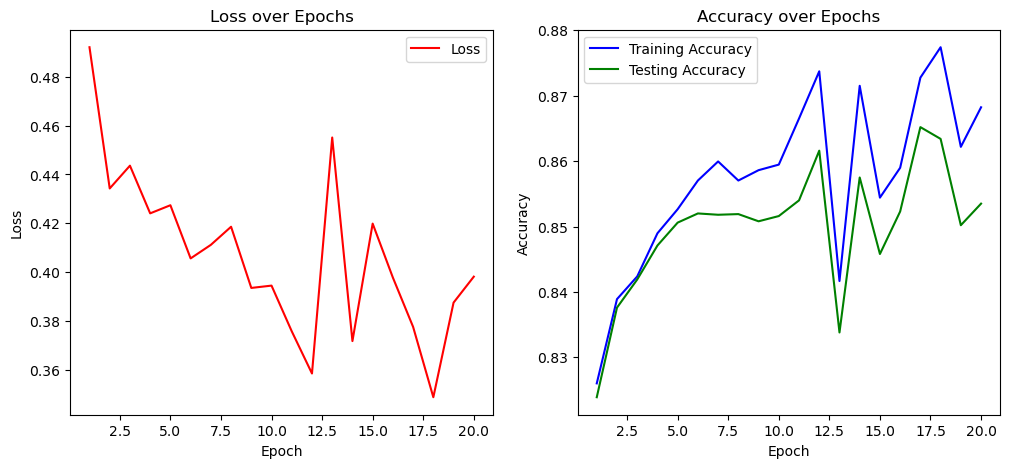

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Neural network with two hidden layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        out = self.output_layer(out)
        return out

# Load and prepare the dataset
train_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_train.csv")
test_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_test.csv")
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Hyperparameters
input_size = 784
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10
num_epochs = 20
batch_size = 16
learning_rate = 0.01

# Initialize the model
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
history = {'loss': [], 'train_acc': [], 'test_acc': []}
for epoch in range(num_epochs):
    permutation = torch.randperm(X_train.size()[0])
    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Calculate accuracy and loss for this epoch on training and test sets
    with torch.no_grad():
        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_acc = (train_predicted == y_train).sum().item() / y_train.size(0)

        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_acc = (test_predicted == y_test).sum().item() / y_test.size(0)
        
        history['loss'].append(train_loss.item())
        history['train_acc'].append(train_acc)
        history['test_acc'].append(test_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluation after training
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred = test_predicted.cpu().numpy()
y_true = y_test.cpu().numpy()
print("Classification report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=2))

# Plot training history
plot_metrics(history)


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class AlexNetLike(nn.Module):
    def __init__(self):
        super(AlexNetLike, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(96, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3 * 3, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Load and prepare the dataset
train_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_train.csv")
test_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_test.csv")

X_train = train_data.iloc[:, 1:].values.reshape(-1, 1, 28, 28) / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values.reshape(-1, 1, 28, 28) / 255.0
y_test = test_data.iloc[:, 0].values

# Convert to tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model
model = AlexNetLike().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())

print("Classification report:")
print(classification_report(y_test.numpy(), np.array(y_pred), target_names=class_names))


KeyboardInterrupt: 

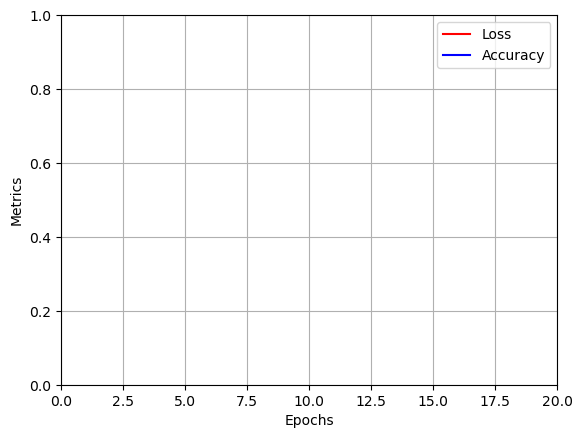

Epoch 1, Batch 1, Loss: 2.3026, Time per batch: 0.00s
Epoch 1, Batch 51, Loss: 2.2612, Time per batch: 0.00s
Epoch 1, Batch 101, Loss: 2.2315, Time per batch: 0.00s
Epoch 1, Batch 151, Loss: 2.1475, Time per batch: 0.00s
Epoch 1, Batch 201, Loss: 2.0292, Time per batch: 0.00s
Epoch 1, Batch 251, Loss: 1.8700, Time per batch: 0.00s
Epoch 1, Batch 301, Loss: 1.7089, Time per batch: 0.00s
Epoch 1, Batch 351, Loss: 1.6055, Time per batch: 0.00s
Epoch 1, Batch 401, Loss: 1.4721, Time per batch: 0.00s
Epoch 1, Batch 451, Loss: 1.3254, Time per batch: 0.00s
Epoch 1, Batch 501, Loss: 1.2131, Time per batch: 0.00s
Epoch 1, Batch 551, Loss: 1.1846, Time per batch: 0.00s
Epoch 1, Batch 601, Loss: 0.9660, Time per batch: 0.00s
Epoch 1, Batch 651, Loss: 0.9518, Time per batch: 0.00s
Epoch 1, Batch 701, Loss: 0.9462, Time per batch: 0.00s
Epoch 1, Batch 751, Loss: 1.0545, Time per batch: 0.00s
Epoch 1, Batch 801, Loss: 0.9153, Time per batch: 0.00s
Epoch 1, Batch 851, Loss: 0.8761, Time per batch: 0

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import time

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        out = self.output_layer(out)
        return out

class Animator:
    """For plotting data in animation with real-time training feedback."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=None):
        if fmts is None:
            fmts = ['-'] * len(legend)
        self.fig, self.ax = plt.subplots()
        self.lines = []
        for fmt, label in zip(fmts, legend):
            line, = self.ax.plot([], [], fmt, label=label)
            self.lines.append(line)
        self.ax.set_xlabel(xlabel)
        self.ax.set_ylabel(ylabel)
        if xlim:
            self.ax.set_xlim(xlim)
        if ylim:
            self.ax.set_ylim(ylim)
        self.ax.set_xscale(xscale)
        self.ax.set_yscale(yscale)
        self.ax.legend()
        self.ax.grid(True)
        plt.show(block=False)

    def add(self, x, ys):
        for line, y in zip(self.lines, ys):
            line.set_xdata(np.append(line.get_xdata(), x))
            line.set_ydata(np.append(line.get_ydata(), y))
        if x >= self.ax.get_xlim()[1]:
            self.ax.set_xlim(self.ax.get_xlim()[0], x + 1)
        self.ax.figure.canvas.draw()
        plt.pause(0.001)

# Load and prepare the dataset
train_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_train.csv")
test_csv = pd.read_csv("D:/下载的文件/archive/fashion-mnist_test.csv")
X_train = train_csv.iloc[:, 1:].values.reshape(-1, 784) / 255.0
y_train = train_csv.iloc[:, 0].values
X_test = test_csv.iloc[:, 1:].values.reshape(-1, 784) / 255.0
y_test = test_csv.iloc[:, 0].values

# Convert data to tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Initialize model, loss, and optimizer
model = NeuralNet(784, 128, 64, 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Initialize the animator
animator = Animator('Epochs', 'Metrics', ['Loss', 'Accuracy'], xlim=[0, 20], ylim=[0, 1], fmts=['r-', 'b-'])

# Training the model
num_epochs = 20
batch_size = 64
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)):
        start_time = time.time()

        # Forward pass
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_time = time.time() - start_time
        if i % 50 == 0:  # Update every 50 batches
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item():.4f}, Time per batch: {batch_time:.2f}s')

    # Evaluation
    model.eval()
    with torch.no_grad():
        predictions = model(X_train)
        _, predicted = torch.max(predictions, 1)
        train_accuracy = (predicted == y_train).float().mean()

    animator.add(epoch+1, [loss.item(), train_accuracy.item()])
    print(f'Epoch {epoch+1} complete. Loss: {loss.item():.4f}, Accuracy: {train_accuracy.item():.4f}')

    model.train()

# Final evaluation and classification report
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    _, predicted = torch.max(predictions, 1)
    accuracy = (predicted == y_test).float().mean()

print(f'Test Accuracy: {accuracy.item():.4f}')
print("Classification report:")
print(classification_report(y_test.cpu().numpy(), predicted.cpu().numpy(), target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))
